<a href="https://colab.research.google.com/github/cooperp15/SQC/blob/main/SQC_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [143]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SQC - HW 6 - 13.19.csv to SQC - HW 6 - 13.19 (1).csv
User uploaded file "SQC - HW 6 - 13.19.csv" with length 775 bytes


In [144]:
import pandas as pd
data = pd.read_csv('SQC - HW 6 - 13.19.csv', sep=',', na_values=".")
data

,std_order,run_order,a,b,c,d,Total
0,1,29,-1,-1,-1,-1,7.037
1,2,5,1,-1,-1,-1,14.707
2,3,26,-1,1,-1,-1,11.635
3,4,4,1,1,-1,-1,17.273
4,5,30,-1,-1,1,-1,10.403
5,6,23,1,-1,1,-1,4.368
6,7,11,-1,1,1,-1,9.360
7,8,24,1,1,1,-1,13.440
8,9,13,-1,-1,-1,1,8.561
9,10,18,1,-1,-1,1,16.867


In [145]:
a1 = data[['a']].to_numpy()
b1 = data[['b']].to_numpy()
c1 = data[['c']].to_numpy()
d1 = data[['d']].to_numpy()

In [146]:
ab = a1*b1
data['ab'] = ab

In [147]:
ac = a1*c1
data['ac'] = ac

In [148]:
bc = b1*c1
data['bc'] = bc

In [149]:
abc = a1*b1*c1
data['abc'] = abc

In [150]:
ad = a1*d1
data['ad'] = ad

In [151]:
bd = b1*d1
data['bd'] = bd

In [152]:
abd = a1*b1*d1
data['abd'] = abd

In [153]:
cd = c1*d1
data['cd'] = cd

In [154]:
acd = a1*c1*d1
data['acd'] = acd

In [155]:
bcd = b1*c1*d1
data['bcd'] = bcd

In [156]:
abcd = a1*b1*c1*d1
data['abcd'] = abcd

In [157]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   std_order  32 non-null     int64  
 1   run_order  32 non-null     int64  
 2   a          32 non-null     int64  
 3   b          32 non-null     int64  
 4   c          32 non-null     int64  
 5   d          32 non-null     int64  
 6   Total      32 non-null     float64
 7   ab         32 non-null     int64  
 8   ac         32 non-null     int64  
 9   bc         32 non-null     int64  
 10  abc        32 non-null     int64  
 11  ad         32 non-null     int64  
 12  bd         32 non-null     int64  
 13  abd        32 non-null     int64  
 14  cd         32 non-null     int64  
 15  acd        32 non-null     int64  
 16  bcd        32 non-null     int64  
 17  abcd       32 non-null     int64  
dtypes: float64(1), int64(17)
memory usage: 4.6 KB


In [158]:
Xmain=df[['a',	'b',	'c', 'd']]
Xmain

,a,b,c,d
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [159]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=4, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'a',	'b',	'c',	'ab',	'ac',	'bc',	'abc', 'd', 'ad', 'bd', 'abd', 'cd', 'acd', 'bcd', 'abcd'])
xxpd['abcd']=abcd
xxpd

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1


In [160]:
X=xxpd[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y=data[['Total']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 8.2573125],
       [13.4478125],
       [10.2538125],
       [19.1165625],
       [ 8.6496875],
       [ 5.8246875],
       [10.8381875],
       [11.6854375],
       [10.3426875],
       [15.3371875],
       [12.2376875],
       [21.2964375],
       [10.5813125],
       [ 7.5603125],
       [12.6683125],
       [13.7115625],
       [ 8.2573125],
       [13.4478125],
       [10.2538125],
       [19.1165625],
       [ 8.6496875],
       [ 5.8246875],
       [10.8381875],
       [11.6854375],
       [10.3426875],
       [15.3371875],
       [12.2376875],
       [21.2964375],
       [10.5813125],
       [ 7.5603125],
       [12.6683125],
       [13.7115625]])

In [161]:
# 13.19 A

In [162]:
X=xxpd[['I','a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     12.90
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           7.35e-07
Time:                        06:00:35   Log-Likelihood:                -60.089
No. Observations:                  32   AIC:                             142.2
Df Residuals:                      21   BIC:                             158.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.345     34.721      0.0

13.19 A

The factors a (pouring temperature), b (titanium content), c (heat treatment method), and ab, ac, and bc have large coefficient magnitudes. They also have p values less than 0.05 showing that they have significant impact on the crack length (Totals).

In [163]:
# 13.19 B

In [164]:
model = ols('Total ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(a):C(c) + C(a):C(d) + C(b):C(c) + C(b):C(d) + C(c):C(d)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),72.908850,1.0,19.104827,0.000268
C(b),126.460656,1.0,33.137389,0.000010
C(c),103.464113,1.0,27.111440,0.000037
C(d),30.662280,1.0,8.034656,0.009929
C(a):C(b),29.926716,1.0,7.841911,0.010721
C(a):C(c),128.496480,1.0,33.670850,0.000009
C(a):C(d),0.046818,1.0,0.012268,0.912857
C(b):C(c),0.073728,1.0,0.019319,0.890779
C(b):C(d),0.017861,1.0,0.004680,0.946105
C(c):C(d),0.047278,1.0,0.012389,0.912432


13.9 B

The p values for a, b, c, d, ab, and ac have p-values less than 0.05. This shows that those factors are affecting the crack length.

In [165]:
# 13.19 C

In [166]:
X2=xxpd[['I','a', 'b', 'c','d','ab', 'ac']]
Y2=data[['Total']]
Y2=Y2.to_numpy()
model2 = sm.OLS(Y2, X2)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     7.255
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           0.000144
Time:                        06:00:35   Log-Likelihood:                -75.412
No. Observations:                  32   AIC:                             164.8
Df Residuals:                      25   BIC:                             175.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.511     23.468      0.0

In [167]:
# 13.19 D

In [168]:
res2.resid

0    -3.28800
1     3.29725
2    -0.63575
3     0.04925
4     3.77025
5    -3.34950
6     0.58950
7    -0.28350
8    -3.72175
9     3.49950
10   -0.35250
11    0.64250
12    3.25550
13   -3.55025
14    0.46175
15   -0.02825
16   -3.94900
17    3.80925
18   -0.18175
19    0.59125
20    3.51825
21   -3.61950
22    0.48250
23   -0.80050
24   -3.33175
25    3.68450
26   -0.57050
27    0.45750
28    3.74650
29   -3.77125
30    0.20675
31   -0.62825
dtype: float64

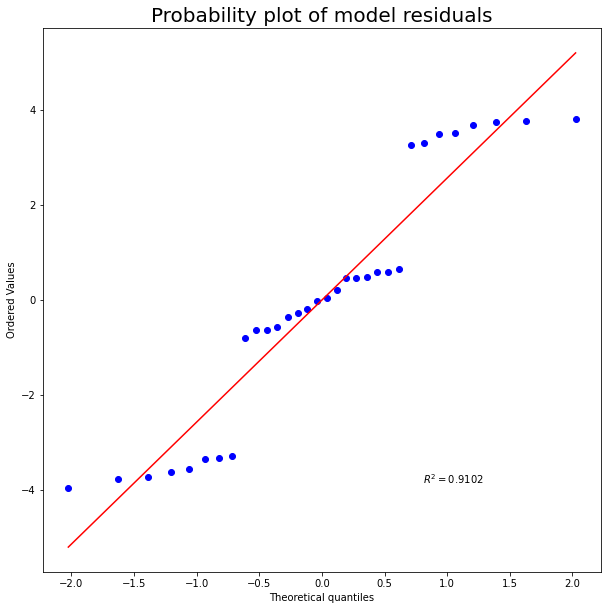

In [169]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residuals", fontsize= 20)
ax.set

plt.show()

13.19 D

The residuals for the reduced factors do not follow normal distribution. This shows that any inferences can not be made with certainty.

In [170]:
# 13.19 E

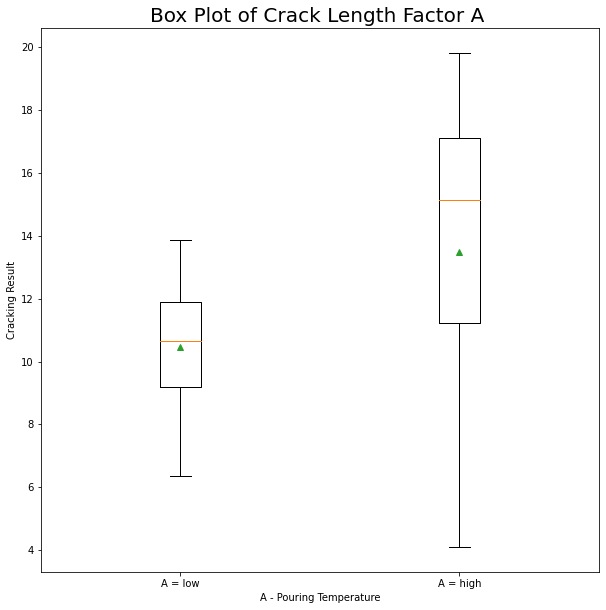

In [171]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Crack Length Factor A ", fontsize= 20)
ax.set

boxdata= [data['Total'][data['a'] == -1],
             data['Total'][data['a'] == 1]]


ax.boxplot(boxdata,
           labels= ['A = low', 'A = high'],
           showmeans= True)

plt.xlabel("A - Pouring Temperature")
plt.ylabel("Cracking Result")

plt.show()

A higher pouring temperature results in longer crack lengths and a larger variability.

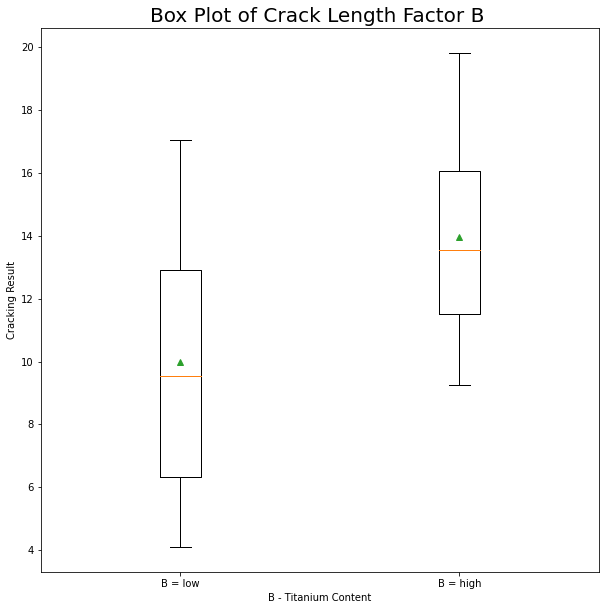

In [172]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Crack Length Factor B ", fontsize= 20)
ax.set

boxdata= [data['Total'][data['b'] == -1],
             data['Total'][data['b'] == 1]]


ax.boxplot(boxdata,
           labels= ['B = low', 'B = high'],
           showmeans= True)

plt.xlabel("B - Titanium Content")
plt.ylabel("Cracking Result")

plt.show()

A higher level of titanium content results in longer crack lengths. A lower level of titanium content results in a greater variability for the crack length.

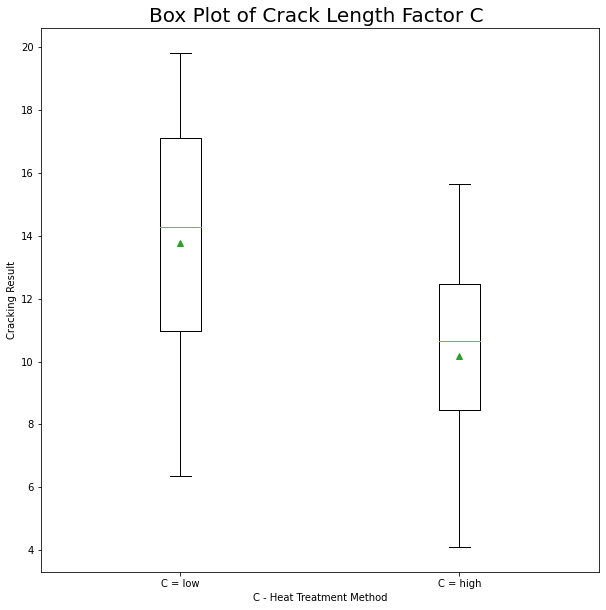

In [173]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Crack Length Factor C ", fontsize= 20)
ax.set

boxdata= [data['Total'][data['c'] == -1],
             data['Total'][data['c'] == 1]]


ax.boxplot(boxdata,
           labels= ['C = low', 'C = high'],
           showmeans= True)

plt.xlabel("C - Heat Treatment Method")
plt.ylabel("Cracking Result")

plt.show()

Heat treatment has low results for both greater variability and longer crack lengths.

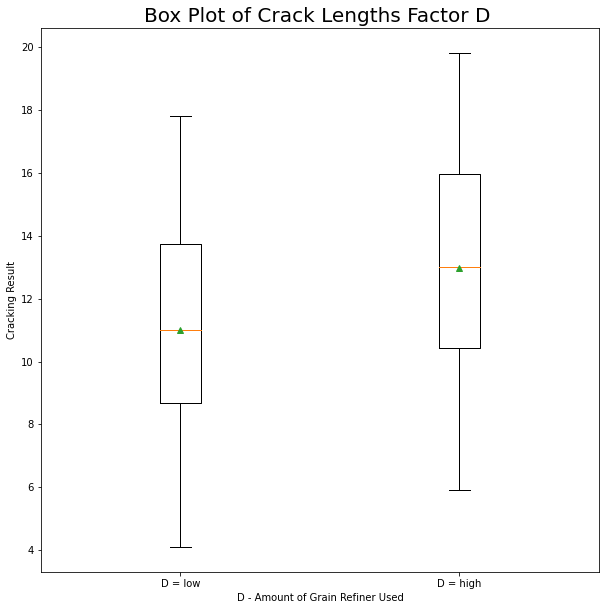

In [174]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Crack Lengths Factor D ", fontsize= 20)
ax.set

boxdata= [data['Total'][data['d'] == -1],
             data['Total'][data['d'] == 1]]


ax.boxplot(boxdata,
           labels= ['D = low', 'D = high'],
           showmeans= True)

plt.xlabel("D - Amount of Grain Refiner Used")
plt.ylabel("Cracking Result")

plt.show()

A higher amount of grain refiner results in longer crack lengths and greater variability.

In [175]:
# 13.19 F

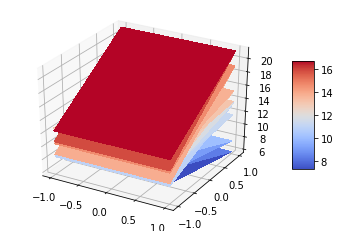

In [176]:
# 3D plot of factor a
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['a']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

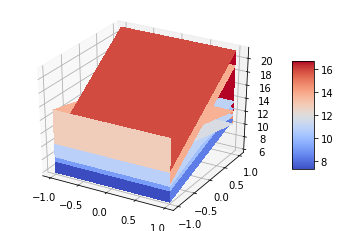

In [177]:
# 3D plot of factor b
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['b']
x2=data['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

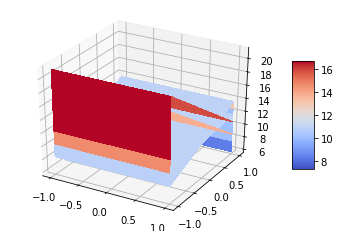

In [178]:
# 3D plot of factor c
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['c']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

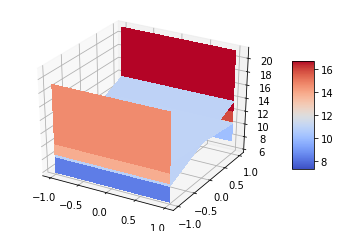

In [179]:
# 3D plot of factor d
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['d']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

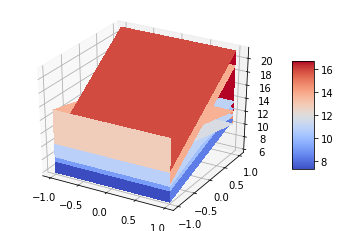

In [180]:
# 3D plot factors a and b
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

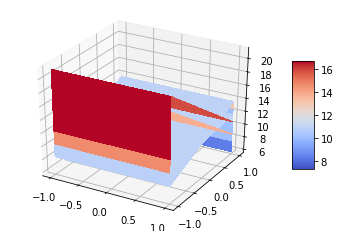

In [181]:
# 3D plot of factors a and c
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

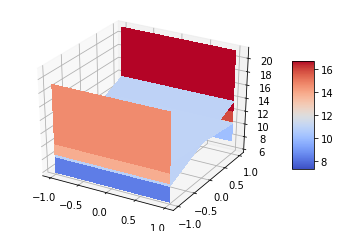

In [182]:
# 3D plot of factors a and d
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

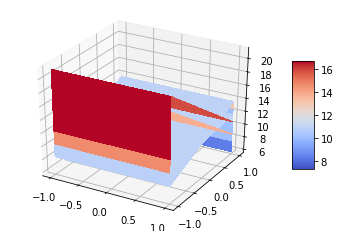

In [183]:
# 3D plot of factors b and c
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['b']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot surface
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

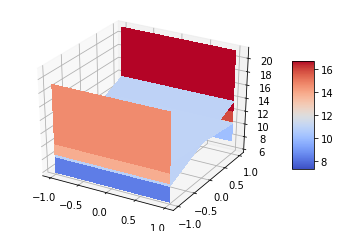

In [184]:
# 3D plot of factors b and d
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['b']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

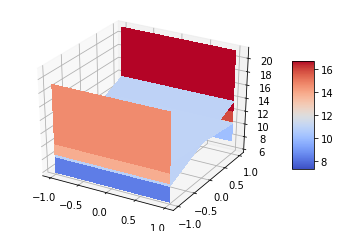

In [185]:
# 3D model of factors c and d
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['c']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Higher levels of factors a, b, and d will produce larger crack lengths. This same outcome will occur when lower levels of factor c are used.

By doing the opposite, lower a, b, and d, and higher c, the crack lengths will lessen.

In [186]:
# 13.20

In [187]:
C_plus = xxpd[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][xxpd['c'] == 1]
C_plus['Total'] = data['Total'][data['c'] == 1]
C_plus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,Total
23,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1,12.923
28,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1,12.337
29,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1,5.904
30,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1,10.935
31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,15.053


In [188]:
C_minus = xxpd[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][xxpd['c'] == -1]
C_minus['Total'] = data['Total'][data['c'] == -1]
C_minus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,Total
19,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1,17.815
24,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1,8.951
25,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1,17.052
26,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1,13.658
27,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1,19.639


In [189]:
X3=C_plus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y3=C_plus[['Total']]
regr=LinearRegression()
regr.fit(X3,Y3)
Yhat3=regr.predict(X3)
Yhat3

array([[10.2291875],
       [ 4.2808125],
       [ 9.2586875],
       [13.2293125],
       [12.1393125],
       [ 5.9666875],
       [11.1103125],
       [15.3051875],
       [10.2291875],
       [ 4.2808125],
       [ 9.2586875],
       [13.2293125],
       [12.1393125],
       [ 5.9666875],
       [11.1103125],
       [15.3051875]])

In [190]:
X4=C_minus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y4=C_minus[['Total']]
regr=LinearRegression()
regr.fit(X4,Y4)
Yhat4=regr.predict(X4)
Yhat4

array([[ 6.6778125],
       [14.9916875],
       [11.8333125],
       [17.5726875],
       [ 8.7846875],
       [16.9308125],
       [13.7956875],
       [19.7028125],
       [ 6.6778125],
       [14.9916875],
       [11.8333125],
       [17.5726875],
       [ 8.7846875],
       [16.9308125],
       [13.7956875],
       [19.7028125]])

In [191]:
# 13.20 A

In [192]:
model3 = sm.OLS(Y3, X3)
res3=model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     467.1
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           1.06e-10
Time:                        06:00:40   Log-Likelihood:                 3.5427
No. Observations:                  16   AIC:                             6.915
Df Residuals:                       9   BIC:                             12.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a             -0.2472      0.032     -7.649      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [193]:
model4 = sm.OLS(Y4, X4)
res4=model4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     562.7
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           4.59e-11
Time:                        06:00:40   Log-Likelihood:                 1.8147
No. Observations:                  16   AIC:                             10.37
Df Residuals:                       9   BIC:                             15.78
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a              1.7567      0.036     48.790      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


13.20 A

When the factor c (heat treatment method) is positive, the result is longer crack lengths. When factor c is negative, the result is shorter crack lengths. 

When factors a and bc are negative, and all other factors are positive, the result is shorter crack lengths.

When factors c, d, ac, bc, and bd are positive, and all other factors are negative, the result is a longer crack length.

In [194]:
# 13.20 B

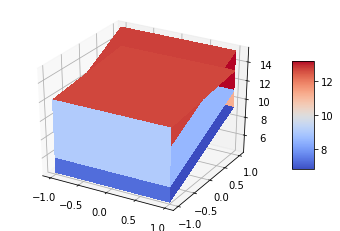

In [195]:
# 3D plot of factors a and b vs y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_plus['a']
x2=C_plus['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

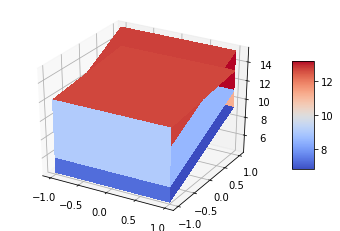

In [196]:
# 3D plot of factors a and d vs y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_plus['a']
x2=C_plus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

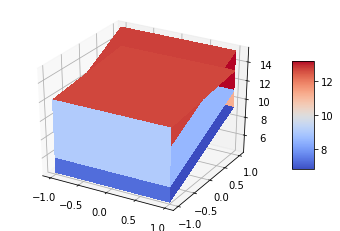

In [197]:
# 3D plot of factors b and d vs y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_plus['b']
x2=C_plus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

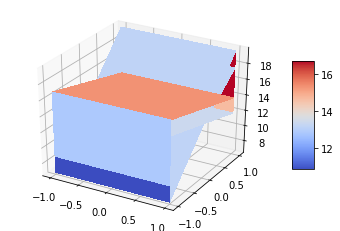

In [198]:
# 3D plot of factors a and b vs y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_minus['a']
x2=C_minus['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

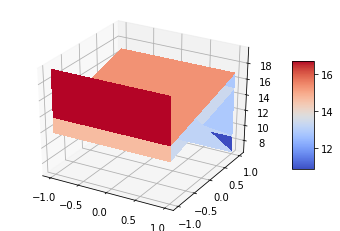

In [199]:
# 3D plot of factors a and d vs y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_minus['a']
x2=C_minus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

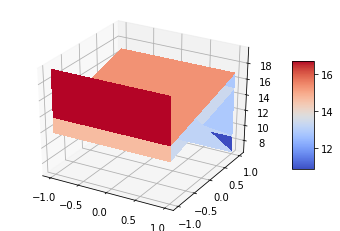

In [200]:
# 3D plot of factors b and d vs y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_minus['b']
x2=C_minus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [201]:
# 13.20 C

13.20 C

I would recommend low levels of factors a, b, and d when using heat treatment method C=+

In [202]:
# 13.20 D

13.20 D

I would recommend low levels of factors a and b and high levels for factor d when using heat treatment method C=-